# Group Part

In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pylab

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Homework 1

Firstly, we load the directed graph from `HW1_problem1.txt` file.

In [3]:
p1 = pd.read_csv('HW1_problem1.txt', sep = ' ', header = None, names = ['start_node', 'finish_node', 'weight'])
print(p1)

  start_node finish_node  weight
0          a           b       5
1          b           c      10
2          c           d      -2
3          b           e       7
4          d           b       8
5          d           e       3
6          a           d       3


Then, we use the build-in function `from_pandas_dataframe()` to create the directed graph based on the dataframe above.

In [4]:
DG = nx.from_pandas_dataframe(p1,'start_node', 'finish_node', ['weight'], create_using = nx.DiGraph())

Before proceeding with the questions **(a)** to **(e)**, we plot the graph as follows.

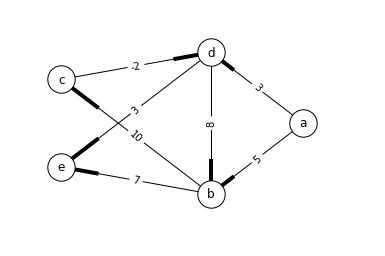

In [12]:
edge_labels = dict([((u, v, ), d['weight'])
                   for u, v, d in DG.edges(data = True)])

pos = nx.circular_layout(DG)
nx.draw_networkx_edge_labels(DG, pos, edge_labels = edge_labels)
nx.draw_networkx_labels(DG, pos)
nx.draw(DG, pos, node_size = 750, node_color = 'white')
pylab.show()


**(a)** We construct and print the node-arc incidence matrix where the rows represent nodes and the columns represent edges. If edge *k* leaves node *i* and ends at node *j* then element $\alpha_{ik} = -1$ and element $\alpha_{jk} = 1$. The rest of the elements have values equal to 0.

In [13]:
# Create the node-arc incidence matrix manually
im = pd.DataFrame([[0] * p1.shape[0]] * len(np.unique([p1['start_node'], p1['finish_node']])), index = sorted(np.unique([p1['start_node'], p1['finish_node']])), columns = list(range(1, p1.shape[0]+1)))
for i in range(1, p1.shape[0]+1):
    im.loc[p1['start_node'][i-1], i] = -1
    im.loc[p1['finish_node'][i-1], i] = 1

# Create the node-arc incidence matrix using networkx
im2 = nx.incidence_matrix(DG, nodelist = sorted(DG.nodes()), oriented = True).todense()
print(im)

   1  2  3  4  5  6  7
a -1  0  0  0  0  0 -1
b  1 -1  0 -1  1  0  0
c  0  1 -1  0  0  0  0
d  0  0  1  0 -1 -1  1
e  0  0  0  1  0  1  0


**(b)** Next, we will calculate and print the shortest-path matrix, which includes the shortest-paths between all nodes.

In [21]:
paths = nx.all_pairs_shortest_path(DG)
for n1 in sorted(DG.nodes()):
    print('Node: ' + n1)
    for n2 in paths[n1]:
        print(paths[n1][n2])
    print('\n')

Node: a
['a']
['a', 'd']
['a', 'd', 'e']
['a', 'b', 'c']
['a', 'b']


Node: b
['b', 'c', 'd']
['b', 'c']
['b', 'e']
['b']


Node: c
['c', 'd']
['c']
['c', 'd', 'e']
['c', 'd', 'b']


Node: d
['d']
['d', 'e']
['d', 'b', 'c']
['d', 'b']


Node: e
['e']




**(c)** We will now calculate the diameter of the graph, which is the longest path among all the shortest path.

In [25]:
lp = []
for n1 in sorted(DG.nodes()):
    for n2 in paths[n1].keys():
        if len(paths[n1][n2]) > len(lp):
            lp = paths[n1][n2]

#diameter = nx.diameter(DG)            
print(lp)

['a', 'd', 'e']


As we see, there are more than one paths of the same length among all the shortest paths. 

**(d)** We will now plot the degree distribution of the graph. The degree of eacch nodes is defined as the sum of edges than are connected to this node.

   in-degree  out-degree  total degree
a          0           2             2
b          2           2             4
c          1           1             2
d          2           2             4
e          2           0             2


<function matplotlib.pyplot.show>

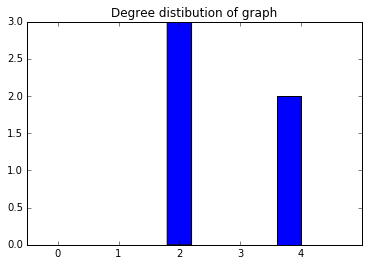

In [37]:
# Degree distribution of the graph
degrees = pd.DataFrame([[0] * 3] * len(DG.nodes()), index = sorted(np.unique([p1['start_node'], p1['finish_node']])), columns = ['in-degree', 'out-degree', 'total degree'])

for n in degrees.index.values:
    degrees['in-degree'][n] = sum(im.loc[n] == 1)
    degrees['out-degree'][n] = sum(im.loc[n] == -1)
    degrees['total degree'][n] = degrees['in-degree'][n] + degrees['out-degree'][n]

print(degrees)

ds = DG.degree()

plt.hist(degrees['total degree']-.2, width = 0.4)
plt.xticks(list(range(max(degrees['total degree']+1))))
#plt.xlabels(list(range(max(degrees['total degree']))))
plt.xlim([-0.5, max(degrees['total degree'])+1])
plt.title('Degree distibution of graph')
plt.show

**(e)** Finally, we will check the connnectivity of the graph. A directed graph can be either **weakly connected** (or just connected) or **strongly connected**. 

It is **weakly connected** if the undirected underlying graph obtained by replacing all directed edges of the graph with undirected edges is a connected graph. By converting out graph to undirected and then checking it's connectivity, we see that the graph is weakly connected.

In [39]:
nx.is_connected(DG.to_undirected())

True

Our graph is ***strongly connected** if it contains a directed path from x to y and a directed path from y to x for every pair of vertices {x, y}. If we observe the paths we printed previously, we see that from some nodes theere aren't paths to all the other nodes, thus our graph is not strongly connected.

### Homework 2

Firstly, we load the undirected graph from `HW1_problem2.txt` file, which contains the adjacency matrix of the 34 nodes of the graph and the weights associated with the edges between the nodes. The first 34 rows contain the adjacency matrix, while the last 34 rows contin the weights.

Next, we split the two halves into two matrices and use them to create two undirected graphs, one without weights and another one with weights.

In [61]:
# Load HW1_problem21.txt file
p2 = pd.read_csv('HW1_problem2.txt', sep = ' ', header = None).drop(0, 1)

# Create numpy matrices
n = p2.shape[1]
adjMatrix = np.matrix(p2.iloc[:n, :])
weights = np.matrix(p2.iloc[n:, :], dtype = [('weight', float)])

print('Undirected graph without weights:')
print(adjMatrix)
print('\nUndirected graph with weights:')
print(weights)

Undirected graph without weights:
[[0 1 1 ..., 1 0 0]
 [1 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 1 0]
 ..., 
 [1 0 0 ..., 0 1 1]
 [0 0 1 ..., 1 0 1]
 [0 0 0 ..., 1 1 0]]

Undirected graph with weights:
[[(0.0,) (4.0,) (5.0,) ..., (2.0,) (0.0,) (0.0,)]
 [(4.0,) (0.0,) (6.0,) ..., (0.0,) (0.0,) (0.0,)]
 [(5.0,) (6.0,) (0.0,) ..., (0.0,) (2.0,) (0.0,)]
 ..., 
 [(2.0,) (0.0,) (0.0,) ..., (0.0,) (4.0,) (4.0,)]
 [(0.0,) (0.0,) (2.0,) ..., (4.0,) (0.0,) (5.0,)]
 [(0.0,) (0.0,) (0.0,) ..., (4.0,) (5.0,) (0.0,)]]


In [62]:
# Create graphs
G = nx.from_numpy_matrix(adjMatrix) 
Gw = nx.from_numpy_matrix(weights)

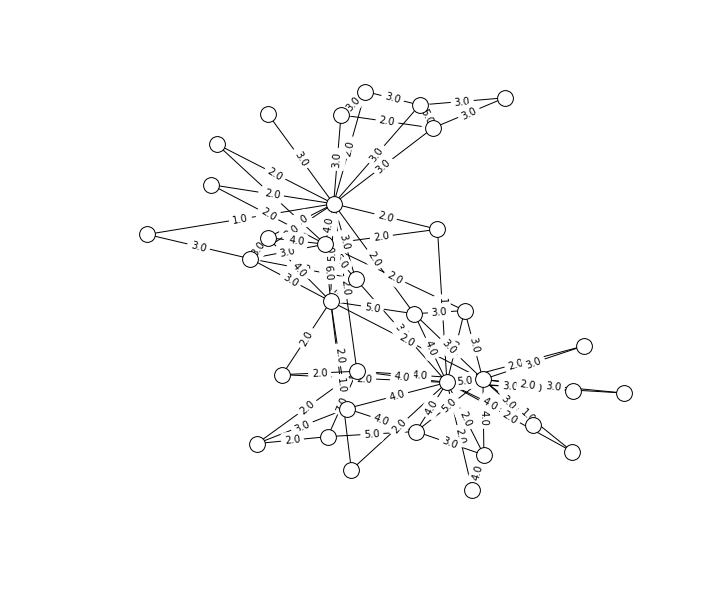

In [82]:
# Plot graphs
edge_labels = dict([((u, v, ), d['weight'])
                   for u, v, d in Gw.edges(data = True)])

plt.figure(figsize = (12, 10)) 

pos = nx.spring_layout(Gw)
nx.draw_networkx_edge_labels(Gw, pos, edge_labels = edge_labels)
#nx.draw_networkx_labels(Gw, pos)
nx.draw(Gw, pos, node_size = 250, node_color = 'white')

plt.show()

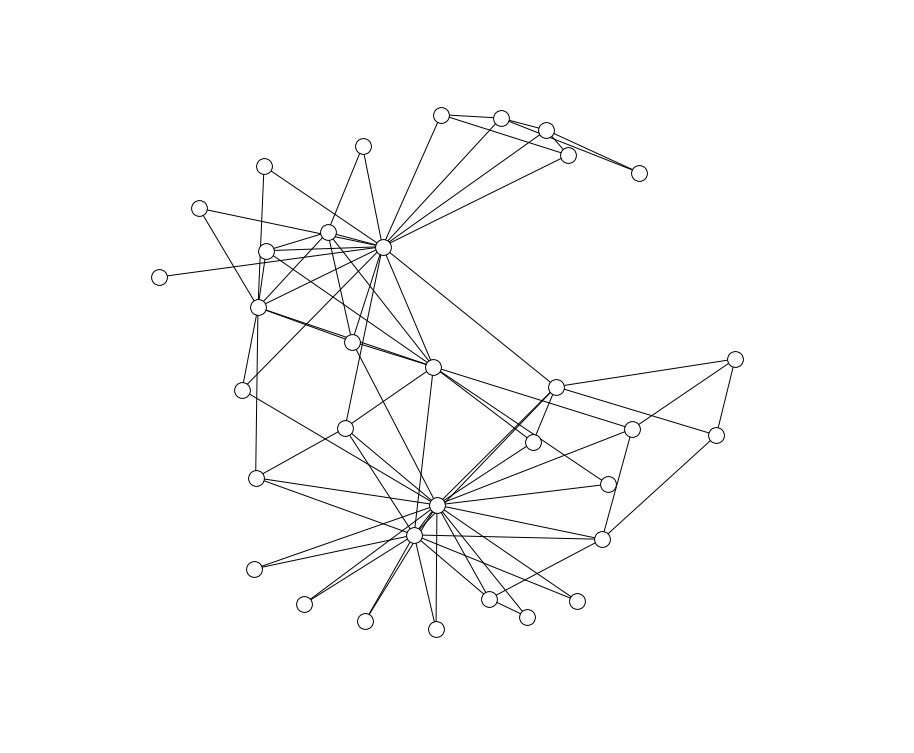

In [83]:
# Plot graphs
plt.figure(figsize = (12, 10)) 

pos = nx.spring_layout(G)
#nx.draw_networkx_labels(G, pos)
nx.draw(G, pos, node_size = 250, node_color = 'white')

plt.show()